# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [18]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [19]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [23]:
discr_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
cont_col = ['BMI']
for col in discr_col:
    data[col] = data[col].fillna(data[col].median())
    
for col in cont_col:
    data[col] = data[col].fillna(data[col].mean())

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [32]:
data[data.Age > 50].sum().Class

38.0

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [37]:
data.sort_values('Pregnancies', ascending=False).iloc[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [43]:
data[(data.Age < 30) & (data.Pregnancies >= 3)]['Pregnancies'].count()

117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [51]:
data[(data.BloodPressure >= 80) & (data.BloodPressure <= 89)]['BloodPressure'].count() \
    /data.BloodPressure.count() * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [54]:
data[(data.BloodPressure > 89) & (data.BMI >= 30)].BMI.count()

45

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [61]:
data.groupby('Class').agg('mean')[['Glucose', 'BloodPressure', 'Insulin']]

,Glucose,BloodPressure,Insulin
Class,,,
0,110.682000,70.920000,127.792000
1,142.130597,75.123134,164.701493


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

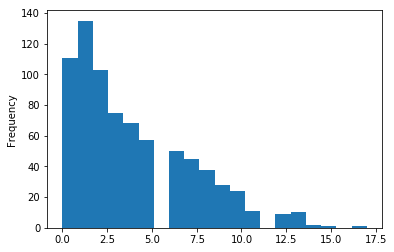

In [72]:
data['Pregnancies'].plot.hist(bins=20)

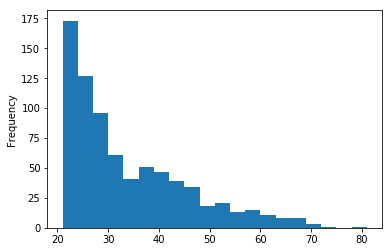

In [73]:
data['Age'].plot.hist(bins=20)

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

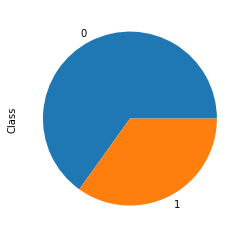

In [85]:
data.Class.value_counts().plot.pie()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

In [116]:
import seaborn as sns
import scipy.stats as st

/Users/biryuk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


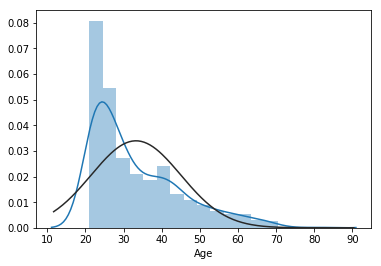

In [117]:
sns.distplot(data.Age, fit=st.norm)

/Users/biryuk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


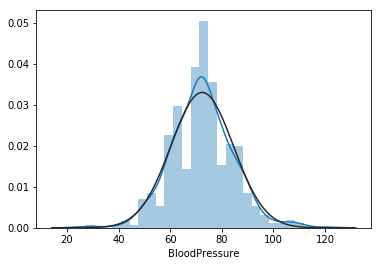

In [118]:
sns.distplot(data.BloodPressure, fit=st.norm)

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

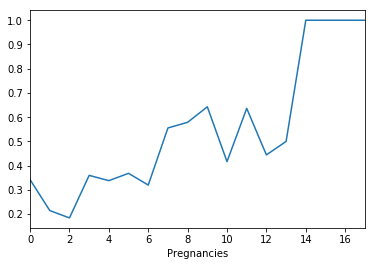

In [121]:
dep = data.groupby('Pregnancies').mean()['Class']
dep.plot.line()

In [130]:
import numpy as np

/Users/biryuk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


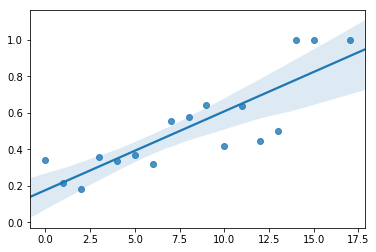

In [131]:
sns.regplot(np.array(dep.index), dep.values)

$(x_i, y_i)$

$f(x) = k*x + b$

$Loss() = \sum(y_p - y_i)^2 = \sum(k * x_i + b - y_i)^2$

$\sum(k * x_i + b - y_i)^2 -> min$

$Loss(k)' = 0$
$\sum(k * x_i + (b - y_i))^2 = (\sum k^2*x_i^2  + 2 kx_i(b-y_i) + (b - y_i)^2)' =
\sum( 2x_i^2k + 2x_i(b-y_i) ) = 0$


$(b - y_i)^2 = b^2 + 2by_i + y_i^2$

$Loss(b)' = 0$
$(\sum k^2*x_i^2  + 2 kx_i(b-y_i) + (b - y_i)^2)' =
\sum (2kx_i + 2b + 2y_i) = 0
$





$\sum( x_i^2k + x_i(b-y_i) ) = 0$

$\sum (kx_i + b + y_i) = 0$



$k*\sum x_i^2 + b\sum x_i + \sum x_i * y_i = 0$

$k\sum x_i + n*b + \sum y_i = 0 $


__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [ ]:
def my_func(x):
    if x >= 1:
        return 1
    else:
        return 0

In [88]:
data['wasPregnant'] = data.Pregnancies.apply(lambda x: 1 if x >= 1 else 0)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [98]:
data.groupby(['wasPregnant', 'Class']).count()['Age']
ill_w = data[data.Class == 1].groupby('wasPregnant').count()['Age']
all_w = data.groupby('wasPregnant').count()['Age']
pd.DataFrame(ill_w/all_w)

,Age
wasPregnant,
0,0.342342
1,0.350076


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [99]:
def bmi_cat(x):
    if x < 18.5:
        return 'Underweight'
    elif x < 24.9:
        return 'Normal weight'
    elif x < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

In [102]:
data['bodyType'] = data['BMI'].apply(bmi_cat)

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [113]:
zoh = (data.bodyType == 'Normal weight') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89)
kn = data[zoh].Class
kn.value_counts(normalize=True).loc[1] * 100

10.0